# <b> Bike Sharing Assignment

## **Problem Statement** 
build a multiple linear regression model for the prediction of demand for shared bikes

## <b> Data

### <b> Import Data

In [2]:
# import data manipulation pakages
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['patch.edgecolor'] = 'none'

# ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# import data
df = pd.DataFrame(pd.read_csv('day.csv'))


### <b> Examinate Data

In [4]:
# show dataset first rows
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# show dataframe shape
df.shape

(730, 16)

In [6]:
# show data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### <b> Data Cleaning

In [7]:
# Check Null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# drop irrelevant data based on the information provided by data dictionary
df.drop(['casual', 'registered', 'instant'], axis=1, inplace=True) 

### **Data preperation**

In [9]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [10]:
# convert date column to date time
df['dteday'] = pd.to_datetime(df['dteday'], format = '%d-%m-%Y')
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,2018-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,2018-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,2018-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,2018-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,2018-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [11]:
# seperate categorical and numerical variables into 2 lists
cat_cols = [x for x in df.columns if df[x].nunique() <= 12]
num_cols = list(set(df.columns) - set(cat_cols) - {'dteday'})

print('cat_cols: ', cat_cols, '\n', 'num_cols: ', num_cols)


cat_cols:  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] 
 num_cols:  ['atemp', 'windspeed', 'hum', 'temp', 'cnt']


In [12]:
# convert categorical data back to original values
df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace=True)
# df['yr'].replace({0: 2018, 1:2019}, inplace=True)
df['weathersit'].replace({1:'clear', 2:'mist', 3:'light snow/rain'}, inplace=True)
df['weekday'].replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)
df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Sun,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,Spring,0,Jan,0,Mon,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,Spring,0,Jan,0,Tue,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,Spring,0,Jan,0,Wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,Spring,0,Jan,0,Thu,1,clear,9.305237,11.46350,43.6957,12.522300,1600
5,2018-01-06,Spring,0,Jan,0,Fri,1,clear,8.378268,11.66045,51.8261,6.000868,1606
6,2018-01-07,Spring,0,Jan,0,Sat,1,mist,8.057402,10.44195,49.8696,11.304642,1510
7,2018-01-08,Spring,0,Jan,0,Sun,0,mist,6.765000,8.11270,53.5833,17.875868,959
8,2018-01-09,Spring,0,Jan,0,Mon,0,clear,5.671653,5.80875,43.4167,24.250650,822
9,2018-01-10,Spring,0,Jan,0,Tue,1,clear,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
# create dummies values for categorical variables that have more than 2 values
df = pd.concat([df, pd.get_dummies(df['season'], drop_first=True, dtype='int', prefix='season')], axis=1) 
df = pd.concat([df, pd.get_dummies(df['weekday'], drop_first=True, dtype='int', prefix='weekday')], axis=1) 
df = pd.concat([df, pd.get_dummies(df['weathersit'], drop_first=True, dtype='int', prefix='weathersit')], axis=1) 
df = pd.concat([df, pd.get_dummies(df['mnth'], drop_first=True, dtype='int', prefix='mnth')], axis=1) 
df.head(10).style

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow/rain,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,2018-01-01 00:00:00,Spring,0,Jan,0,Sun,0,mist,14.110847,18.181250,80.583300,10.749882,985,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2018-01-02 00:00:00,Spring,0,Jan,0,Mon,0,mist,14.902598,17.686950,69.608700,16.652113,801,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2018-01-03 00:00:00,Spring,0,Jan,0,Tue,1,clear,8.050924,9.470250,43.727300,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018-01-04 00:00:00,Spring,0,Jan,0,Wed,1,clear,8.200000,10.606100,59.043500,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2018-01-05 00:00:00,Spring,0,Jan,0,Thu,1,clear,9.305237,11.463500,43.695700,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,2018-01-06 00:00:00,Spring,0,Jan,0,Fri,1,clear,8.378268,11.660450,51.826100,6.000868,1606,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,2018-01-07 00:00:00,Spring,0,Jan,0,Sat,1,mist,8.057402,10.441950,49.869600,11.304642,1510,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7,2018-01-08 00:00:00,Spring,0,Jan,0,Sun,0,mist,6.765000,8.112700,53.583300,17.875868,959,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8,2018-01-09 00:00:00,Spring,0,Jan,0,Mon,0,clear,5.671653,5.808750,43.416700,24.250650,822,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,2018-01-10 00:00:00,Spring,0,Jan,0,Tue,1,clear,6.184153,7.544400,48.291700,14.958889,1321,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
df.columns


Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light snow/rain', 'weathersit_mist',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [15]:
# group categorical variables with dummies into list
cat_dumms = [x for x in df.columns if set(df[x].unique()).issubset({0,1})]
df[cat_dumms].head(10).style

,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow/rain,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### <b> EDA

#### **Univaritate Analysis**

In [16]:
# calculate summary statistics of numerical data
df[num_cols].describe()

,atemp,windspeed,hum,temp,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,23.726322,12.763620,62.765175,20.319259,4508.006849
std,8.150308,5.195841,14.237589,7.506729,1936.011647
min,3.953480,1.500244,0.000000,2.424346,22.000000
25%,16.889713,9.041650,52.000000,13.811885,3169.750000
50%,24.368225,12.125325,62.625000,20.465826,4548.500000
75%,30.445775,15.625589,72.989575,26.880615,5966.000000
max,42.044800,34.000021,97.250000,35.328347,8714.000000


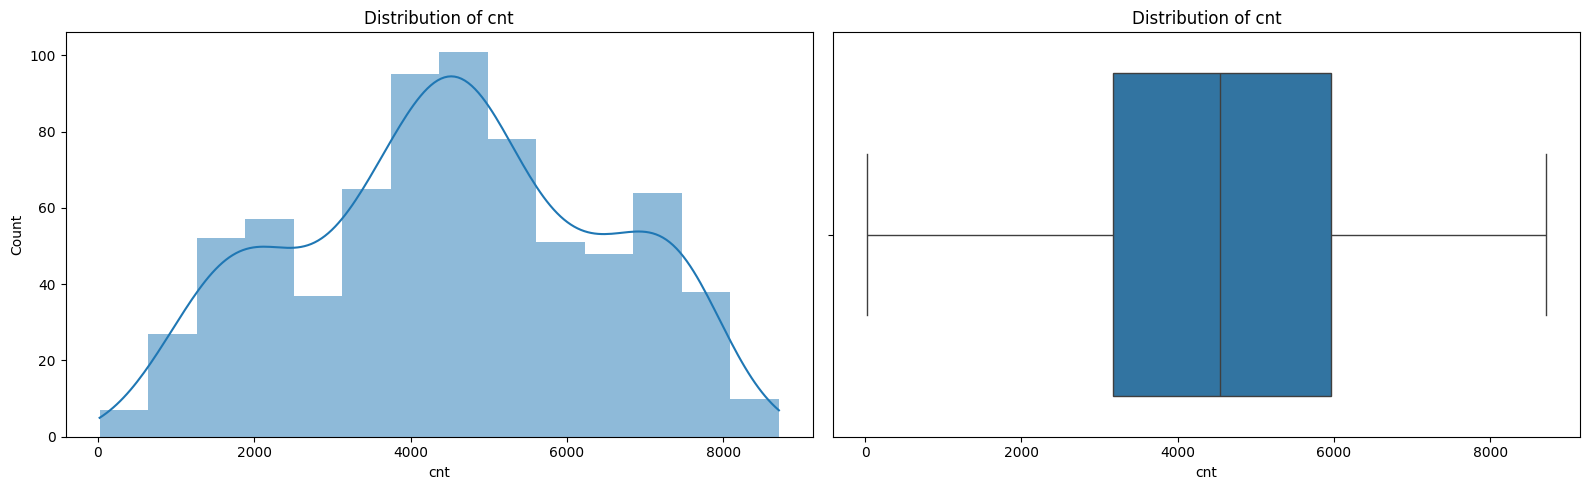

In [17]:
# distribution of target variable 'cnt'
col_name = 'cnt'

# create 2 subplots
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

# create histplot for distribution of cnt
sns.histplot(df[col_name], kde=True, ax=axs[0])
# add title and axis lable to subplot
axs[0].set_title(f'Distribution of {col_name}')
# axs[0].set_xlabel(f'{col_name} values')

# create boxplot for distribution of cnt
sns.boxplot(x=df['cnt'], ax=axs[1])
# add title and axis lable to subplot
axs[1].set_title(f'Distribution of {col_name}')
# axs[1].set_xlabel(f'{col_name} values')

plt.tight_layout()

#### **Bivariate Analysis**

##### Target Variable vs Numerical Data

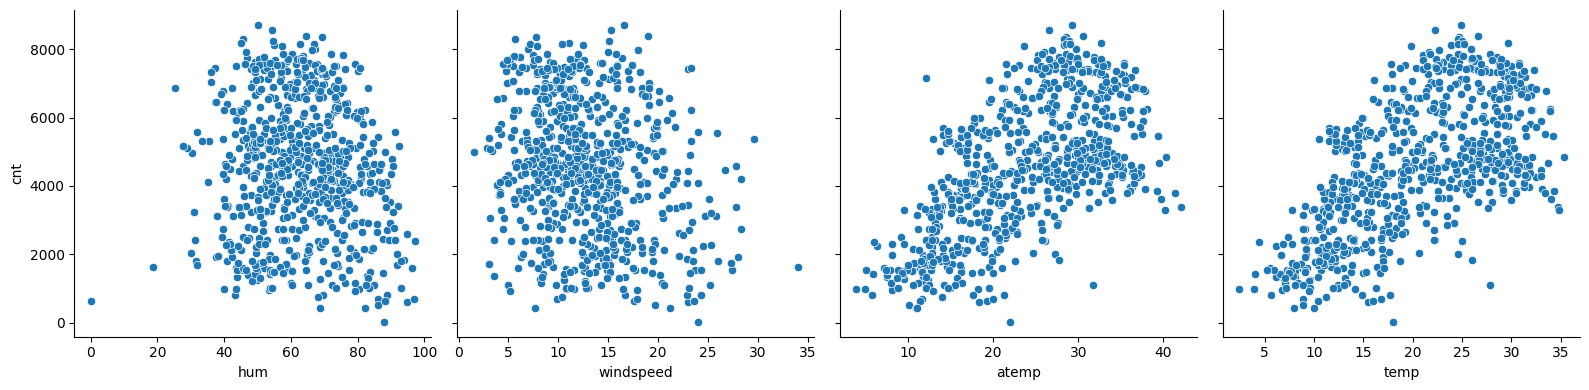

In [18]:
# target variables vs other numerical variables
sns.pairplot(df, x_vars=list(set(num_cols)-{'cnt'}), y_vars='cnt', height=4, aspect=1, kind='scatter')
plt.tight_layout()

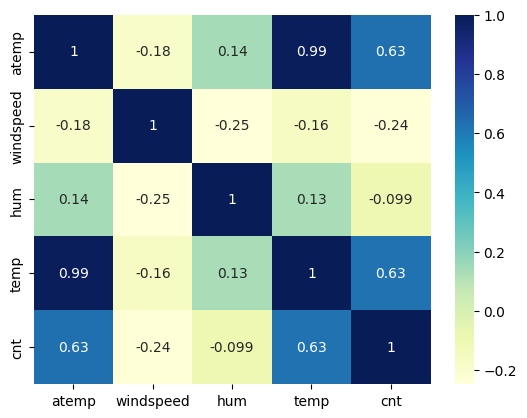

In [19]:
# correlation between target variables and other numerical variables
sns.heatmap(df[num_cols].corr(),cmap='YlGnBu', annot=True)
plt.show()

In [20]:
# calcuate VIF to eliminate variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

display(df[list(set(num_cols)-{'cnt'})].head())

# Extract the features as an array
X = df[list(set(num_cols)-{'cnt'})].values
print(X)

# Create an empty dataframe to store the VIF values
vif_data = pd.DataFrame()

# Add the feature names to the dataframe
vif_data['feature'] = list(set(num_cols)-{'cnt'})
display(vif_data.head())

# Calculate the VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(len(X[0]))]
print(vif_data)

,hum,windspeed,atemp,temp
0,80.5833,10.749882,18.18125,14.110847
1,69.6087,16.652113,17.68695,14.902598
2,43.7273,16.636703,9.47025,8.050924
3,59.0435,10.739832,10.60610,8.200000
4,43.6957,12.522300,11.46350,9.305237


[[80.5833   10.749882 18.18125  14.110847]
 [69.6087   16.652113 17.68695  14.902598]
 [43.7273   16.636703  9.47025   8.050924]
 ...
 [75.2917    8.333661 12.12     10.386653]
 [48.3333   23.500518 11.585    10.489153]
 [57.75     10.374682 11.17435   8.849153]]


,feature
0,hum
1,windspeed
2,atemp
3,temp


     feature         VIF
0        hum   11.071034
1  windspeed    4.678072
2      atemp  542.888840
3       temp  488.306256


In [21]:
# drop variable with highest VIF
df.drop('atemp',axis=1, inplace=True)
num_cols = list(set(num_cols)- {'atemp'})
df.head(10).style

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow/rain,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,2018-01-01 00:00:00,Spring,0,Jan,0,Sun,0,mist,14.110847,80.583300,10.749882,985,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2018-01-02 00:00:00,Spring,0,Jan,0,Mon,0,mist,14.902598,69.608700,16.652113,801,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2018-01-03 00:00:00,Spring,0,Jan,0,Tue,1,clear,8.050924,43.727300,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018-01-04 00:00:00,Spring,0,Jan,0,Wed,1,clear,8.200000,59.043500,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2018-01-05 00:00:00,Spring,0,Jan,0,Thu,1,clear,9.305237,43.695700,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,2018-01-06 00:00:00,Spring,0,Jan,0,Fri,1,clear,8.378268,51.826100,6.000868,1606,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,2018-01-07 00:00:00,Spring,0,Jan,0,Sat,1,mist,8.057402,49.869600,11.304642,1510,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7,2018-01-08 00:00:00,Spring,0,Jan,0,Sun,0,mist,6.765000,53.583300,17.875868,959,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8,2018-01-09 00:00:00,Spring,0,Jan,0,Mon,0,clear,5.671653,43.416700,24.250650,822,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,2018-01-10 00:00:00,Spring,0,Jan,0,Tue,1,clear,6.184153,48.291700,14.958889,1321,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Target Variable vs Categorical Data

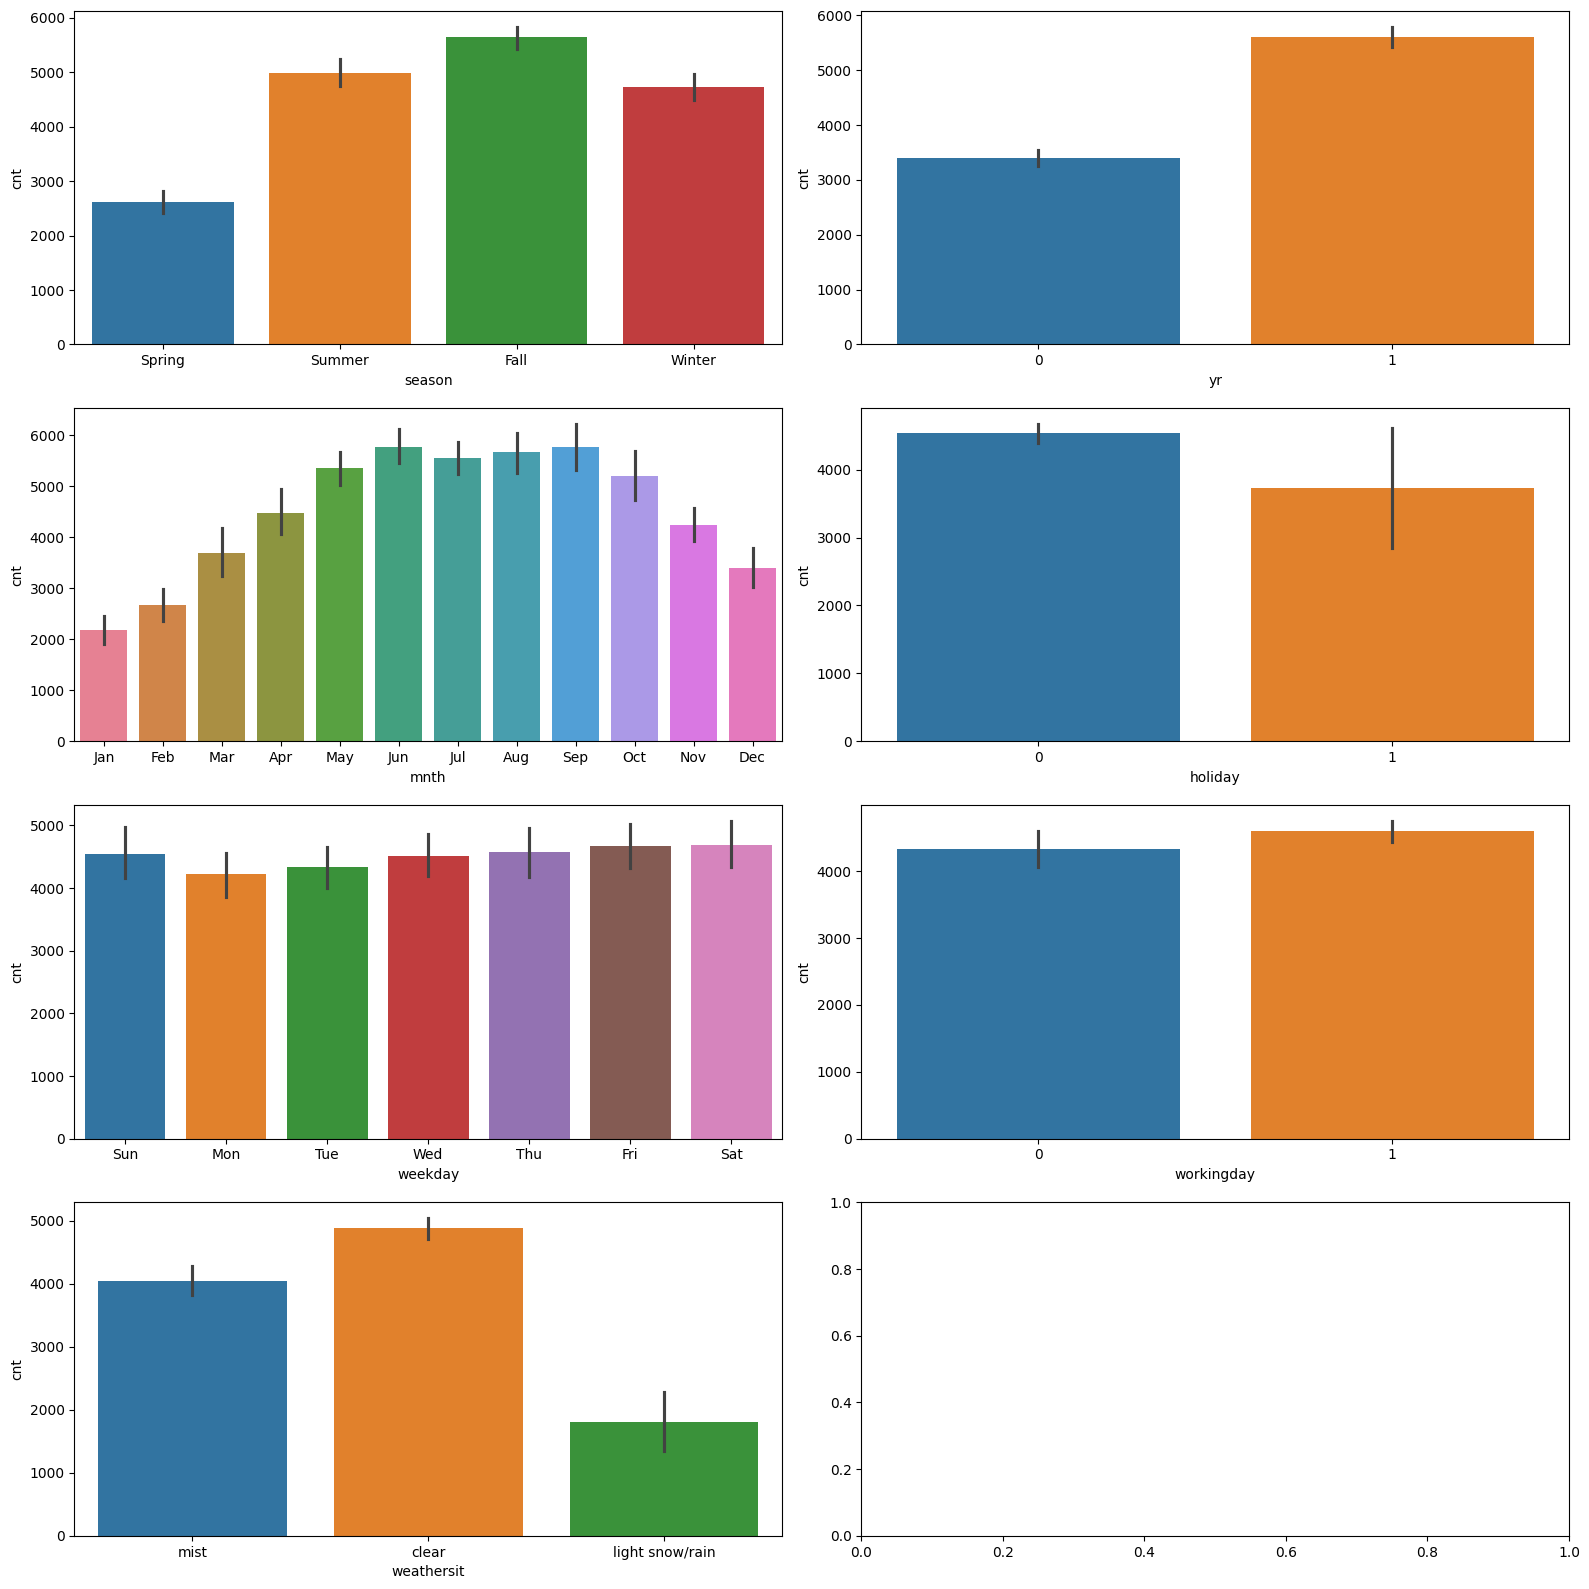

In [22]:
# visualize bivariate analysis between target variable and other categorical variables
fig, axs = plt.subplots(ncols=2, nrows = int(round(len(cat_cols)/2, 0)), figsize=(16,16))
for i, ax in zip(range(len(cat_cols)), axs.flat):
    sns.barplot(x=df[cat_cols[i]], y=df['cnt'], hue=df[cat_cols[i]], ax=ax)
    ax.legend([],[], frameon=False)

plt.tight_layout()


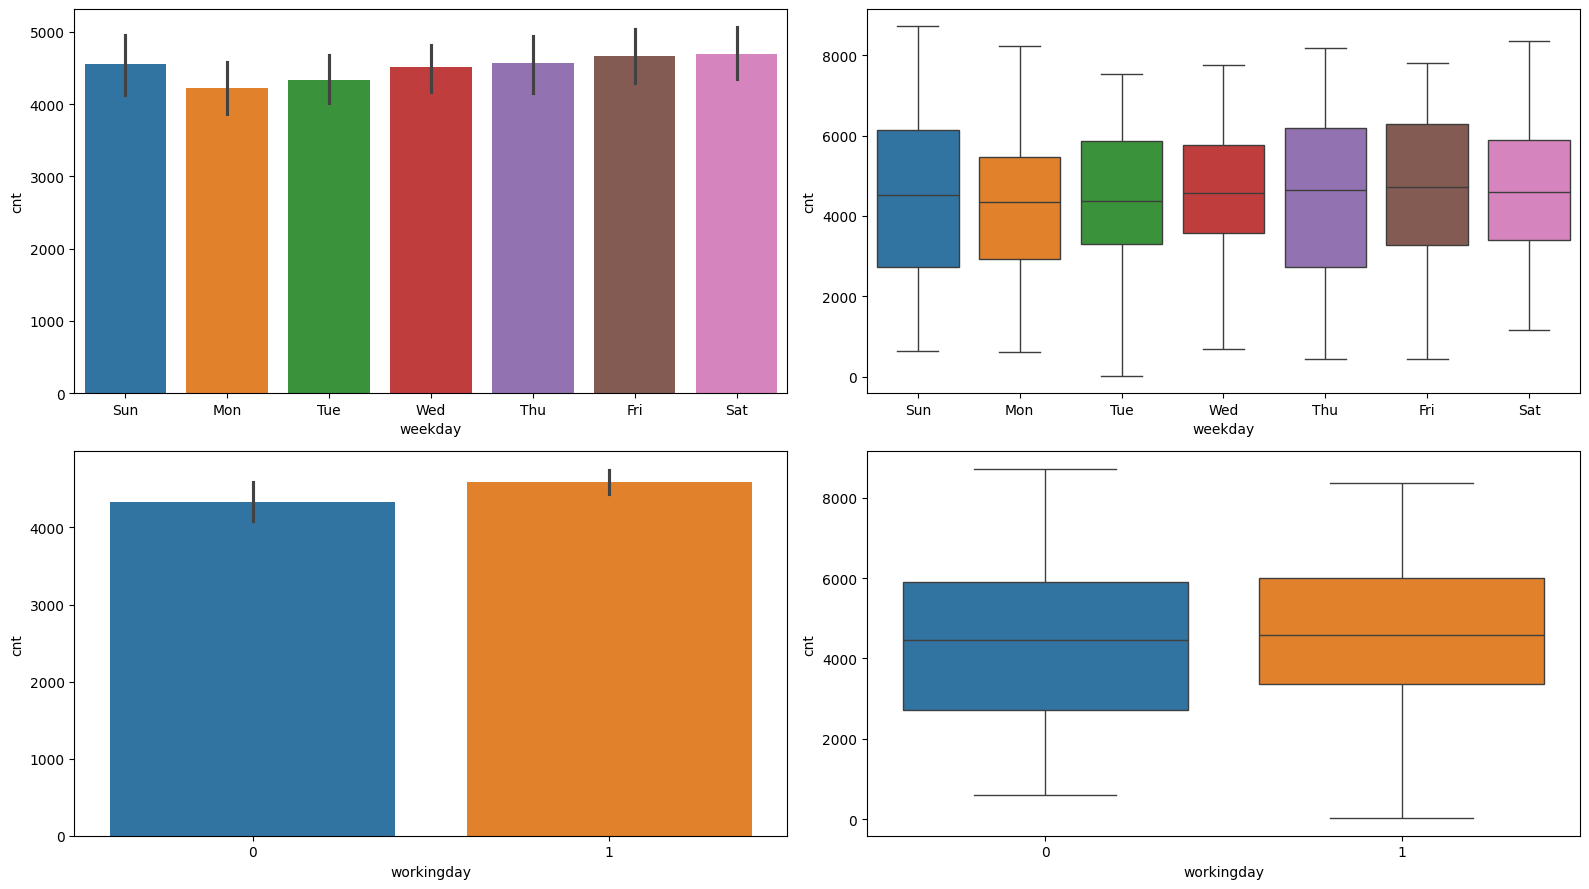

In [23]:
# boxplot for additional visualization
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16,9))

# weekday variable
sns.barplot(x=df['weekday'], y=df['cnt'], hue=df['weekday'], ax=axs[0,0])
axs[0,0].legend([],[], frameon=False) # hide legends
sns.boxplot(x=df['weekday'], y=df['cnt'], hue=df['weekday'], ax=axs[0,1])
axs[0,1].legend([],[], frameon=False) # hide legends

# workingday variable
sns.barplot(x=df['workingday'], y=df['cnt'], hue=df['workingday'], ax=axs[1,0])
axs[1,0].legend([],[], frameon=False) # hide legends
sns.boxplot(x=df['workingday'], y=df['cnt'], hue=df['workingday'], ax=axs[1,1])
axs[1,1].legend([],[], frameon=False) # hide legends


plt.tight_layout()

#### **Model Building**

##### Train / Test Sets

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df[num_cols+cat_dumms], train_size = 0.8, random_state = 100)

##### Rescaling

In [25]:
# import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# create scaler object
scaler = MinMaxScaler()

# rescaling
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

df_train.head(10).style

,hum,windspeed,cnt,temp,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow/rain,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
367,0.454701,0.695175,0.254717,0.113228,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
648,0.477458,0.299450,0.868385,0.468352,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44,0.387290,0.807474,0.217556,0.443431,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
705,0.787463,0.189819,0.573631,0.326094,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
379,0.431945,0.449210,0.263346,0.133996,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31,0.854854,0.023452,0.153935,0.165779,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
491,0.684414,0.405059,0.719167,0.596072,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
469,0.523401,0.393037,0.817994,0.682257,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
564,0.618721,0.264694,0.755752,0.885778,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
693,0.482610,0.232600,0.276346,0.232641,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


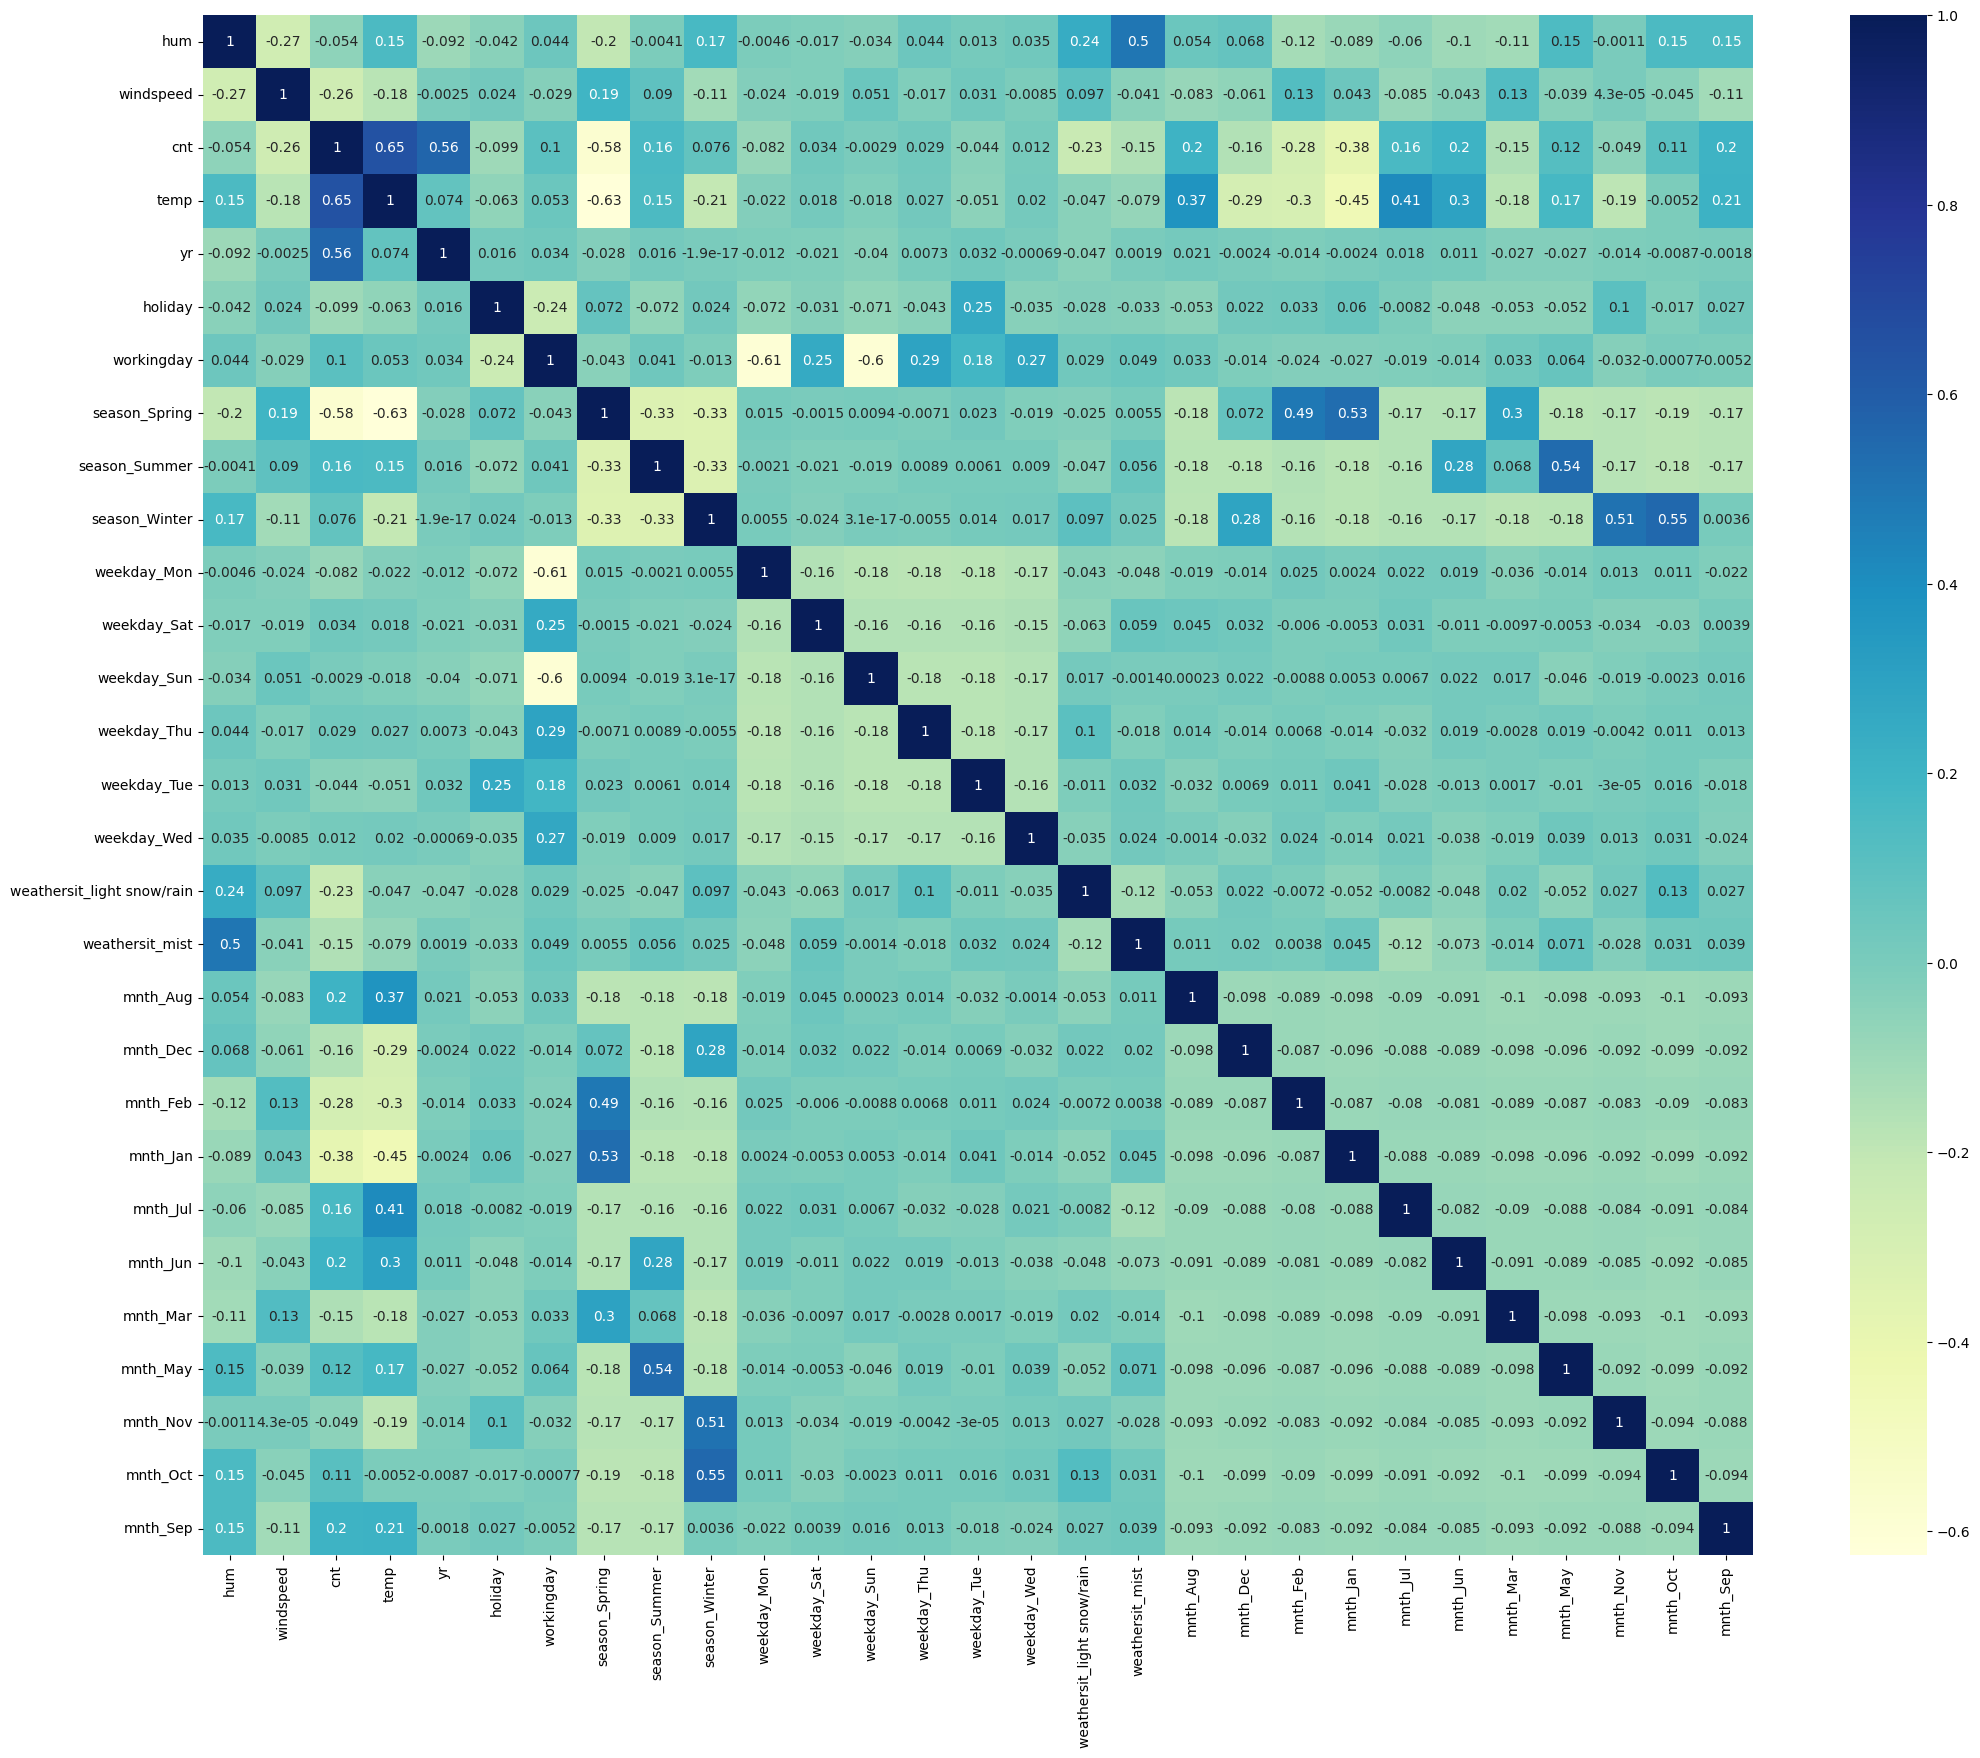

In [26]:
# correlation matrix of train set
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),cmap='YlGnBu', annot=True)
plt.show()

##### Model building - All Variables

In [27]:
#Divide train data into X_train and y_train data
y_train = df_train.pop('cnt')
X_train = df_train

**Feature Elimination**

Recursive Feature Elimination

In [28]:
# import SKlearn packages for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Use RFE to auto select 15 variables
lm = LinearRegression()
lm.fit (X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [30]:
# show selected varables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('hum', True, 1),
 ('windspeed', True, 1),
 ('temp', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 7),
 ('weathersit_light snow/rain', True, 1),
 ('weathersit_mist', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', False, 2)]

In [31]:
# create X_train with selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]

Manual Feature Elimination

In [32]:
# create functions for statsmodel creation 
import statsmodels.api as sm

def create_s_model (X_arr):
    # Add a constant to get an intercept
    X_sm = sm.add_constant(X_arr)

    # create model and fit the line
    lr = sm.OLS(y_train, X_sm).fit()

    # show summary
    display(lr.summary())

    return lr, X_sm

In [33]:
# create function to calculate VIF

def cal_vif (X_arr):
# Extract the features as an array
    X = X_arr

    # Create an empty dataframe to store the VIF values
    vif = pd.DataFrame()

    # Add the feature names to the dataframe
    vif['feature'] = X.columns

    # Calculate the VIF for each feature
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # print VIF
    print(vif.sort_values(by='VIF', ascending=False))

In [34]:
# build statsmodel
create_s_model (X_train_rfe)
# calculate vif
cal_vif(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          2.02e-223
Time:                        15:26:33   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3155      0.031     10.212      0.000       0.255       0.376
hum                           -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed                     -0.1838      0.024     -7.763      0.000      -0.230      -0.137
temp                           0.4458      0.031     14.594      0.000       0.386       0.506
yr                             0.2289      0.007     30.876      0.000       0.214       0.243
holiday                       -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday                     0.0510      0.010      4.920      0.000       0.031       0.071
season_Spring                 -0.1105      0.014     -7.800      0.000      -0.138      -0.083
season_Winter                  0.0817      0.012      6.557      0.000       0.057       0.106
weekday_Sun                    0.0613      0.013      4.618      0.000       0.035       0.087
weathersit_light snow/rain    -0.2634      0.025    -10.534      0.000      -0.313      -0.214
weathersit_mist               -0.0597      0.010     -6.135      0.000      -0.079      -0.041
mnth_Dec                      -0.0604      0.015     -3.937      0.000      -0.091      -0.030
mnth_Jan                      -0.0500      0.016     -3.056      0.002      -0.082      -0.018
mnth_Jul                      -0.0787      0.016     -5.030      0.000      -0.109      -0.048
mnth_Nov                      -0.0688      0.017     -4.041      0.000      -0.102      -0.035
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                       feature        VIF
0                          hum  25.866735
2                         temp  18.116449
5                   workingday   5.008047
1                    windspeed   4.250342
6                season_Spring   3.060952
7                season_Winter   2.771723
10             weathersit_mist   2.288281
3                           yr   2.082189
8                  weekday_Sun   1.898698
12                    mnth_Jan   1.713360
14                    mnth_Nov   1.711759
11                    mnth_Dec   1.517400
13                    mnth_Jul   1.382886
9   weathersit_light snow/rain   1.225727
4                      holiday   1.194146


holiday is insignificant, can be dropped

In [35]:
# drop holiday variable
X_train_rfe_v1 = X_train_rfe.drop(['holiday'], axis=1)

# rebuild statsmodel
create_s_model (X_train_rfe_v1)

# calculate vif
cal_vif(X_train_rfe_v1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          6.59e-224
Time:                        15:26:33   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3110      0.031     10.079      0.000       0.250       0.372
hum                           -0.1283      0.035     -3.629      0.000      -0.198      -0.059
windspeed                     -0.1847      0.024     -7.787      0.000      -0.231      -0.138
temp                           0.4430      0.031     14.493      0.000       0.383       0.503
yr                             0.2287      0.007     30.792      0.000       0.214       0.243
workingday                     0.0574      0.010      5.889      0.000       0.038       0.077
season_Spring                 -0.1120      0.014     -7.898      0.000      -0.140      -0.084
season_Winter                  0.0817      0.012      6.548      0.000       0.057       0.106
weekday_Sun                    0.0678      0.013      5.290      0.000       0.043       0.093
weathersit_light snow/rain    -0.2634      0.025    -10.513      0.000      -0.313      -0.214
weathersit_mist               -0.0598      0.010     -6.132      0.000      -0.079      -0.041
mnth_Dec                      -0.0620      0.015     -4.037      0.000      -0.092      -0.032
mnth_Jan                      -0.0513      0.016     -3.139      0.002      -0.083      -0.019
mnth_Jul                      -0.0783      0.016     -4.996      0.000      -0.109      -0.048
mnth_Nov                      -0.0722      0.017     -4.254      0.000      -0.106      -0.039
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                       feature        VIF
0                          hum  25.828943
2                         temp  17.922189
4                   workingday   4.444964
1                    windspeed   4.230803
5                season_Spring   3.028674
6                season_Winter   2.770938
9              weathersit_mist   2.287706
3                           yr   2.080716
7                  weekday_Sun   1.771736
11                    mnth_Jan   1.707033
13                    mnth_Nov   1.685464
10                    mnth_Dec   1.510264
12                    mnth_Jul   1.382429
8   weathersit_light snow/rain   1.225287


hum variable has high VIF, can be removed

In [36]:
# drop hum variable
X_train_rfe_v2 = X_train_rfe_v1.drop(['hum'], axis=1)

# rebuild statsmodel
create_s_model (X_train_rfe_v2)

# calculate vif
cal_vif(X_train_rfe_v2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     242.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          2.72e-222
Time:                        15:26:33   Log-Likelihood:                 589.98
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     570   BIC:                            -1091.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2423      0.025      9.842      0.000       0.194       0.291
windspeed                     -0.1611      0.023     -6.989      0.000      -0.206      -0.116
temp                           0.4154      0.030     13.884      0.000       0.357       0.474
yr                             0.2325      0.007     31.269      0.000       0.218       0.247
workingday                     0.0589      0.010      5.984      0.000       0.040       0.078
season_Spring                 -0.1138      0.014     -7.948      0.000      -0.142      -0.086
season_Winter                  0.0752      0.012      6.025      0.000       0.051       0.100
weekday_Sun                    0.0704      0.013      5.445      0.000       0.045       0.096
weathersit_light snow/rain    -0.3003      0.023    -12.967      0.000      -0.346      -0.255
weathersit_mist               -0.0806      0.008    -10.129      0.000      -0.096      -0.065
mnth_Dec                      -0.0675      0.015     -4.371      0.000      -0.098      -0.037
mnth_Jan                      -0.0557      0.016     -3.375      0.001      -0.088      -0.023
mnth_Jul                      -0.0712      0.016     -4.534      0.000      -0.102      -0.040
mnth_Nov                      -0.0722      0.017     -4.210      0.000      -0.106      -0.039
==============================================================================
Omnibus:                      102.825   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.870
Skew:                          -0.833   Prob(JB):                     4.24e-69
Kurtosis:                       6.188   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                       feature       VIF
1                         temp  6.221127
3                   workingday  4.343880
0                    windspeed  4.227115
4                season_Spring  2.438730
5                season_Winter  2.395158
2                           yr  2.072298
6                  weekday_Sun  1.755858
12                    mnth_Nov  1.654094
10                    mnth_Jan  1.623755
8              weathersit_mist  1.545558
9                     mnth_Dec  1.422748
11                    mnth_Jul  1.326667
7   weathersit_light snow/rain  1.077317


windspeed has negative correlation and high VIF, can be dropped

In [37]:
# drop windspeed variable
X_train_rfe_v3 = X_train_rfe_v2.drop(['windspeed'], axis=1)

# rebuild statsmodel
create_s_model (X_train_rfe_v3)

# calculate vif
cal_vif(X_train_rfe_v3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     238.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          2.37e-213
Time:                        15:26:33   Log-Likelihood:                 565.97
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     571   BIC:                            -1049.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1717      0.023      7.347      0.000       0.126       0.218
temp                           0.4466      0.031     14.500      0.000       0.386       0.507
yr                             0.2311      0.008     29.873      0.000       0.216       0.246
workingday                     0.0582      0.010      5.681      0.000       0.038       0.078
season_Spring                 -0.1173      0.015     -7.875      0.000      -0.147      -0.088
season_Winter                  0.0853      0.013      6.606      0.000       0.060       0.111
weekday_Sun                    0.0662      0.013      4.923      0.000       0.040       0.093
weathersit_light snow/rain    -0.3155      0.024    -13.145      0.000      -0.363      -0.268
weathersit_mist               -0.0783      0.008     -9.453      0.000      -0.095      -0.062
mnth_Dec                      -0.0570      0.016     -3.565      0.000      -0.088      -0.026
mnth_Jan                      -0.0426      0.017     -2.499      0.013      -0.076      -0.009
mnth_Jul                      -0.0691      0.016     -4.226      0.000      -0.101      -0.037
mnth_Nov                      -0.0738      0.018     -4.136      0.000      -0.109      -0.039
==============================================================================
Omnibus:                      103.710   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.981
Skew:                          -0.820   Prob(JB):                     4.06e-74
Kurtosis:                       6.347   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                       feature       VIF
0                         temp  5.157344
2                   workingday  4.247645
4                season_Winter  2.386537
3                season_Spring  2.081798
1                           yr  2.064164
5                  weekday_Sun  1.713454
11                    mnth_Nov  1.631823
9                     mnth_Jan  1.623689
7              weathersit_mist  1.543956
8                     mnth_Dec  1.422543
10                    mnth_Jul  1.313828
6   weathersit_light snow/rain  1.062221


mnth_Jan has high p-value, can be dropped

In [38]:
# drop mnth_Jan variable
X_train_rfe_v4 = X_train_rfe_v3.drop(['mnth_Jan'], axis=1)

# rebuild statsmodel
create_s_model (X_train_rfe_v4)

# calculate vif
cal_vif(X_train_rfe_v4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          3.19e-213
Time:                        15:26:33   Log-Likelihood:                 562.80
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     572   BIC:                            -1049.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1578      0.023      6.920      0.000       0.113       0.203
temp                           0.4681      0.030     15.752      0.000       0.410       0.526
yr                             0.2304      0.008     29.667      0.000       0.215       0.246
workingday                     0.0582      0.010      5.652      0.000       0.038       0.078
season_Spring                 -0.1252      0.015     -8.565      0.000      -0.154      -0.097
season_Winter                  0.0859      0.013      6.625      0.000       0.060       0.111
weekday_Sun                    0.0661      0.014      4.899      0.000       0.040       0.093
weathersit_light snow/rain    -0.3119      0.024    -12.959      0.000      -0.359      -0.265
weathersit_mist               -0.0788      0.008     -9.470      0.000      -0.095      -0.062
mnth_Dec                      -0.0474      0.016     -3.038      0.002      -0.078      -0.017
mnth_Jul                      -0.0733      0.016     -4.487      0.000      -0.105      -0.041
mnth_Nov                      -0.0686      0.018     -3.851      0.000      -0.104      -0.034
==============================================================================
Omnibus:                       98.171   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.662
Skew:                          -0.782   Prob(JB):                     7.75e-69
Kurtosis:                       6.232   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                       feature       VIF
0                         temp  5.041972
2                   workingday  4.216341
4                season_Winter  2.369973
1                           yr  2.056501
5                  weekday_Sun  1.705480
10                    mnth_Nov  1.625373
7              weathersit_mist  1.537037
3                season_Spring  1.525106
8                     mnth_Dec  1.368776
9                     mnth_Jul  1.309182
6   weathersit_light snow/rain  1.060305


mnth_Dec has high p-value, can be dropped

In [39]:
# drop weathersit_light snow/rain variable
X_train_rfe_v5 = X_train_rfe_v4.drop(['mnth_Dec'], axis=1)

# rebuild statsmodel
lr, X_train_sm = create_s_model (X_train_rfe_v5)

# calculate vif
cal_vif(X_train_rfe_v5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     278.2
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          1.79e-212
Time:                        15:26:33   Log-Likelihood:                 558.12
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     573   BIC:                            -1046.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1440      0.023      6.399      0.000       0.100       0.188
temp                           0.4888      0.029     16.780      0.000       0.432       0.546
yr                             0.2300      0.008     29.411      0.000       0.215       0.245
workingday                     0.0580      0.010      5.594      0.000       0.038       0.078
season_Spring                 -0.1232      0.015     -8.377      0.000      -0.152      -0.094
season_Winter                  0.0738      0.012      5.939      0.000       0.049       0.098
weekday_Sun                    0.0656      0.014      4.826      0.000       0.039       0.092
weathersit_light snow/rain    -0.3098      0.024    -12.787      0.000      -0.357      -0.262
weathersit_mist               -0.0782      0.008     -9.333      0.000      -0.095      -0.062
mnth_Jul                      -0.0771      0.016     -4.700      0.000      -0.109      -0.045
mnth_Nov                      -0.0507      0.017     -2.997      0.003      -0.084      -0.017
==============================================================================
Omnibus:                       87.864   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.103
Skew:                          -0.734   Prob(JB):                     2.98e-55
Kurtosis:                       5.858   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                      feature       VIF
0                        temp  4.973062
2                  workingday  4.190392
1                          yr  2.053449
4               season_Winter  1.933493
5                 weekday_Sun  1.696790
7             weathersit_mist  1.536788
3               season_Spring  1.482773
9                    mnth_Nov  1.481072
8                    mnth_Jul  1.306706
6  weathersit_light snow/rain  1.060059


##### Residual Analysis

In [40]:
# predict y_train
y_train_pred = lr.predict(X_train_sm)

<Axes: ylabel='Count'>

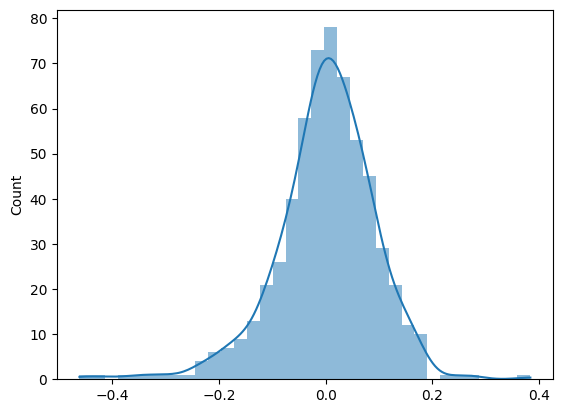

In [41]:
# compute and visualize residuals
res = y_train - y_train_pred
sns.histplot(res, kde=True)

##### Predict and Evaluate on the Test Set

In [42]:
# rescale the test set
df_test[num_cols] = scaler.transform(df_test[num_cols])

display(df_test.head(10).style)
display(df_test.describe())

,hum,windspeed,cnt,temp,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow/rain,weathersit_mist,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0.657364,0.084219,0.692706,0.831783,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,0.610133,0.153728,0.712034,0.901354,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0.837699,0.334206,0.303382,0.511964,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
221,0.437098,0.339570,0.547400,0.881625,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0.314298,0.537414,0.569029,0.817246,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
404,0.579218,0.326196,0.438104,0.256524,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
198,0.671103,0.372990,0.510354,0.856704,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
171,0.793903,0.276724,0.553728,0.774672,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
512,0.696865,0.331536,0.692706,0.814131,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
200,0.728638,0.153738,0.495858,0.883701,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


,hum,windspeed,cnt,temp,yr,holiday,workingday,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.635933,0.315127,0.517368,0.569603,0.445205,0.034247,0.746575,0.226027,0.273973,0.219178,...,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041
std,0.156357,0.161524,0.212757,0.238088,0.498699,0.182488,0.436469,0.419697,0.447530,0.415114,...,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783
min,0.261915,-0.042808,0.055683,0.046591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534457,0.196160,0.391251,0.359075,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.614856,0.306383,0.508916,0.560248,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.730570,0.411976,0.649994,0.801929,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.002146,0.800793,0.963300,0.984424,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# group test set into y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test[X_train_rfe_v5.columns]

# add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [44]:
# prediction
y_test_pred = lr.predict(X_test_sm)

In [45]:
# Evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7806532936222952

In [46]:
# calculate adjusted R-squared
adj_r2 = 1-(((1-r2_score(y_test,y_test_pred))*(len(y_test)-1))/(len(y_test)-len(X_test.columns)-1))
print (adj_r2)

0.7644053894461689


In [123]:
# show data between actual values and predicted values
df_test_pred = pd.concat([y_test, y_test_pred], 
                         axis=1, keys =['actual', 'predicted'])
display(df_test_pred.head(10))

,actual,predicted
184,0.692706,0.395323
535,0.712034,0.872634
299,0.303382,0.447948
221,0.547400,0.632949
152,0.569029,0.601480
404,0.438104,0.434210
198,0.510354,0.543641
171,0.553728,0.502519
512,0.692706,0.772015
200,0.495858,0.556837


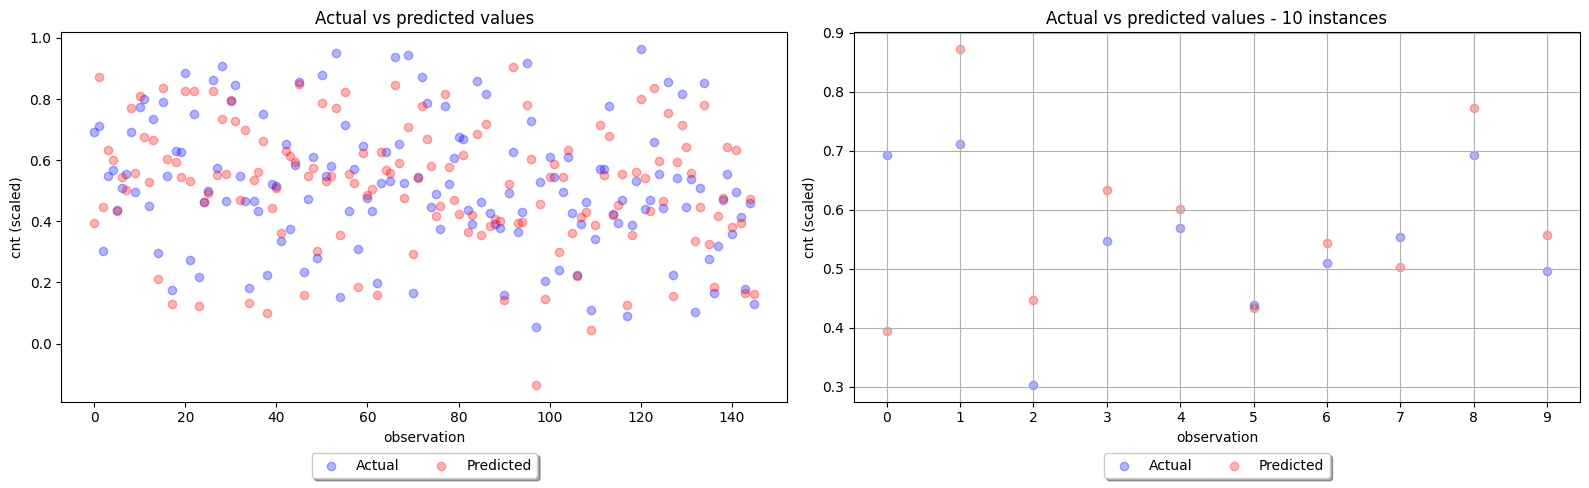

In [132]:
# visualize the plot between actual values and predicted values
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

# for all instances
axs[0].scatter(x = range(0, y_test.size), y= y_test, 
            color='blue',  label = 'Actual', alpha = 0.3)
axs[0].scatter(x = range(0, y_test_pred.size), y= y_test_pred, 
            color='red', label = 'Predicted', alpha = 0.3)
axs[0].set_title('Actual vs predicted values')
axs[0].set_xlabel('observation')
axs[0].set_ylabel('cnt (scaled)')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), 
              fancybox=True, shadow=True, ncol=5)

# for the first 10 instances
axs[1].scatter(x = range(0, 10), y= y_test[:10], 
            color='blue',  label = 'Actual', alpha = 0.3)
axs[1].scatter(x = range(0,10), y= y_test_pred[:10], 
            color='red', label = 'Predicted', alpha = 0.3)
axs[1].set_title('Actual vs predicted values - 10 instances')
axs[1].set_xlabel('observation')
axs[1].set_ylabel('cnt (scaled)')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), 
              fancybox=True, shadow=True, ncol=5)
axs[1].set_xticks(np.arange(10)) # show x ticks
axs[1].grid()

plt.tight_layout()